# Nota de Estudo — Planta de Produção de Hélio Líquido (Solução de Sistema Não-Linear)

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica — UFPE  
> **Início do desenvolvimento:** 26/09/2025  
> **Primeira publicação:** 07/10/2025  
> **Versão atual:** v-2025-10-07 (teste técnico no Colab, teste didático-pedagógico com estudantes e início da revisão final)

---

**Objetivo.** Resolver a planta de produção de hélio líquido por balanços de massa e energia com um trocador criogênico e um separador, estimando a fração liquefeita $w_4/w_1$ e as temperaturas internas (estudo ampliado do Prob. 6-16 do Stoecker).

## Referência
- Stoecker, W. F. *Design of Thermal Systems*, cap. 6, 3ª ed., McGraw-Hill, 1989.

**Estrutura do notebook.**
1. Enunciado do problema  
2. Modelagem matemática  
3. Solução numérica  
4. Estudo paramétrico  
5. Redução no número de equações  
6. Propriedades reais do hélio  
7. Considerações finais

**Notação**
- $w$: vazão mássica (kg/s)  
- $p$: pressão (kPa)  
- $T$: temperatura (K)  
- $h$: entalpia (kJ/kg)  
- $c_p$: calor específico (kJ/(kg·K))  
- $\mathrm{UA}$: produto coeficiente global $\times$ área do trocador (kW/K)


## Revisão

1. Em geral, temos à disposição três tipos de equação para usar:
    - Leis de conservação (*e.g.,*: conservação da massa, conservação da energia) 
    - Relações entre as propriedades termodinâmicas
    - Características dos equipamentos (*e.g.*, eficiência conhecida, alguma propriedade constante)

## Enunciado do Problema

Uma planta de produção de hélio líquido opera segundo o diagrama  Fig. 1. Nela, parte do hélio vapor é liquefeito e a outra parte é devolvida para reciclagem. Determine a vazão de hélio liquido ($w_4$) e as temperaturas do trocador de calor ($T_2$, $T_7$ e $T_8$). 

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-planta-helio-fig-01.png"
       alt="Trocador de Calor de Fluxo em Escoamento Paralelo"
       width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Planta de produção de hélio líquido (Prob. 6-16 do Stoecker).</figcaption>
</figure>   
    
**Condições de operação:**

- **Ponto 1** (vapor entrando no lado quente do trocador):  
  T = 15 K, h = 78,3 kJ/kg, w = 5 g/s, p = 2000 kPa.
- **Ponto 5** (vapor saindo da turbina):  
  T = 8 K, h = 53 kJ/kg, w = 4 g/s.

**Separador:** p = 100 kPa; temperatura de saturação a 100 kPa = 4,2 K.  
Entalpias: líquido saturado $h_f = 10$ kJ/kg; vapor saturado $h_g = 31$ kJ/kg.

**Trocador de calor:** $UA = 100$ W/K.

**Calor específico do vapor de hélio:**
$c_p = \begin{cases}
 = 6,4\ \text{kJ}/(\text{kg}\cdot\text{K}) & \text{a } 2000\ \text{kPa}\\
 = 5,8\ \text{kJ}/(\text{kg}\cdot\text{K}) & \text{a } 100\ \text{kPa}
\end{cases}$


### Modelo matemático


**Parâmetros**

$UA = 0.1\ \text{kW/K}$   
$w1 = 0.005\  \text{kg/s}$    
$w5 = 0.004\  \text{kg/s}$    
$h1 = 78.3\  \text{kJ/kg}$    
$h4 = 10\   \text{kJ/kg}$   
$h5 = 53\   \text{kJ/kg}$   
$h6 = 31\  \text{kJ/kg}$   
$T1 = 15\   \text{K}$   
$T6 = 4.2\  \text{K}$  
$c_{p,100} = 5.8\  \text{kJ/kg.K}$      
$c_{p,2000} = 6.4\  \text{kJ/kg.K}$      


**Equações:**

1. Conservação de massa no sistema: $\quad \quad$ $w_7 + w_4 = w_1 + w_5$  

2. Conservação da massa no separador: $\quad \quad$ $w_4 + w_6 = w_1$ 

3. 1ª Lei no trocador: $\quad \quad$ $w_1(h_1 - h_2) = w_7 (h_8 - h_7)$  

4. 1ª Lei no tanque *flash*: $\quad \quad$ $w_1h_2 = w_4h_4 + w_6 h_6$ 


5. Relação entre $\Delta h$ e $\Delta T$:  $\quad \quad$ $(h_2 - h_1) = c_{2000}(T_2 - T_1)$

6. Relação entre $\Delta h$ e $\Delta T$:  $\quad \quad$ $(h_7 - h_6) = c_{100}(T_7 - T_6)$ 

7. Relação entre $\Delta h$ e $\Delta T$:  $\quad \quad$ $(h_8 - h_6) = c_{100}(T_8 - T_6)$ 


8. 1ª Lei no misturador: $\quad \quad$ $w_7\,h_7 = w_6h_6 + w_5 h_5$


9. Equação do trocador de calor: $\quad \quad$  $w_1(h_1 - h_2) = UA \frac{(T_1-T_8)-(T_2-T_7)}{\ln\big(\frac{T_1-T_8}{T_2-T_7}\big)}$ 



---

**Observação #1**    

Nas equações acima, usamos implicitamente a conservação da energia na válvula de estrangulamento 
(*i.e.*,  $w_3 h_3 = w_2 h_2$).    
  
**Observação #2** 

Em geral, para eliminar problemas de logarítmo de número negativo e divisão por zero na equação tradicional do trocador, na 9a equação do sistema teríamos trocado a forma   
$$
Q = UA \frac{(T_{qe}-T_{fs})-(T_{qs}-T_{fe})}{\ln \big( \frac{T_{qe}-T_{fs}}{T_{qs}-T_{fe}}\big)}
$$
por
$$
(T_{qe}-T_{fs}) =  (T_{qs}-T_{fe}) \exp \left[ \frac{(T_{qe}-T_{fs})-(T_{qs}-T_{fe})}{Q/UA} \right]
$$

No entanto, ao desenvolvermos este *notebook*, encontramos problemas de divergência em muitos pontos durante o estudo paramétrico. A forma mais fácil de solucionar isso foi usar a 9a equação em sua forma logarítmica, mas com testes que evitem valores negativosl
 

**Incógnitas:**  
 $w_4,\ w_6,\ w_7,\ h_2,\ h_7,\ h_8,\ T_2,\ T_7,\ T_8$


**Valores iniciais:**  
$w_4=0,0005\ \text{kg/s}$   
$w_6=0,0045\ \text{kg/s}$    
$w_7=0,0090\ \text{kg/s}$    
$h_2=20\ \text{kJ/kg.K}$   
$h_7=60\ \text{kJ/kg.K}$   
$h_8=80\ \text{kJ/kg.K}$   
$T_2=10\ \text{K}$    
$T_7=7\ \text{K}$    
$T_8=10\ \text{K}$    



In [1]:
import numpy as np

# Incógnitas na ordem:
# x = [w4, w6, w7, h2, h7, h8, T2, T7, T8]
x0 = np.array([0.0005, 0.0045, 0.009, 20, 60, 80, 10, 7, 10], dtype=float)

# Parâmetros como VETOR (sem globais), ordem:
# p = [UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000]
p_base = np.array([0.1, 0.005, 0.004, 78.3, 10.0, 53.0, 31.0, 15.0, 4.2, 5.8, 6.4], dtype=float)

# -------- Eq. (9) estável (LMTD) + penalidade de pinch --------

# --- utilitários ---
def _dtlm_estavel(d1, d2):
    # LMTD robusto (evita 0/0 quando d1≈d2)
    if abs(d1 - d2) <= 1e-8 * max(abs(d1), abs(d2), 1.0):
        return 0.5*(d1 + d2)
    return (d1 - d2)/np.log(d1/d2)

def _soft_clamp_pos(x, eps=1e-6, k=50.0):
    # retorna ~max(x, eps) de forma suave (derivável)
    # softplus: log(1+e^{k(x-eps)})/k  -> 0 se x<<eps
    return eps + np.log1p(np.exp(k*(x - eps)))/k

# --- resíduos com LMTD estável + clamp suave de pinch ---
def sistema_residuos(x, p, alpha=50.0, eps=1e-6, k=50.0):
    # p = [UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000]
    UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000 = p
    w4, w6, w7, h2, h7, h8, T2, T7, T8 = x

    # r1..r8 (iguais aos seus)
    r1 = w7 + w4 - (w1 + w5)
    r2 = w4 + w6 - w1
    r3 = w1*(h1 - h2) - w7*(h8 - h7)
    r4 = w1*h2 - (w4*h4 + w6*h6)
    r5 = (h2 - h1) - cp_2000*(T2 - T1)
    r6 = (h7 - h6) - cp_100*(T7 - T6)
    r7 = (h8 - h6) - cp_100*(T8 - T6)
    r8 = w7*h7 - (w6*h6 + w5*h5)

    # ΔT's do trocador + clamp suave (sempre > eps)
    d1 = T1 - T8
    d2 = T2 - T7
    d1c = _soft_clamp_pos(d1, eps=eps, k=k)
    d2c = _soft_clamp_pos(d2, eps=eps, k=k)

    # r9: SEMPRE impõe UA*LMTD = Q (com LMTD computado nos ΔT "clamped")
    Q   = w1*(h1 - h2)                # kW
    dtm = _dtlm_estavel(d1c, d2c)     # K
    r9  = UA*dtm - Q                  # kW

    # penalidade suave = quanto o clamp "empurrou" (zero se já físico)
    pen_hot  = d1c - d1   # ≥0
    pen_cold = d2c - d2   # ≥0
    r10 = np.sqrt(alpha)*pen_hot
    r11 = np.sqrt(alpha)*pen_cold

    return np.array([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11], dtype=float)


In [2]:
# CÉLULA — Solver com escolha de método e loss robusta
import numpy as np
from scipy.optimize import least_squares

# ordem: [w4, w6, w7, h2, h7, h8, T2, T7, T8]
lb = np.array([0.0,  0.0,  0.0, -200, -200, -200, -50,  -50,  -50], float)
ub = np.array([0.02, 0.02, 0.02,  500,  500,  500, 500,  500,  500], float)

def solve_box(fun, x0, lb, ub, echo=True):  # echo=True (padrão) imprime; False silencia
    res = least_squares(
        fun, x0, bounds=(lb, ub),
        method="trf", xtol=1e-9, ftol=1e-9, gtol=1e-9, max_nfev=2000
    )
    r = fun(res.x)
    if echo:
        print("status =", res.status, "|", res.message)
        print("nfev =", res.nfev, "| ||res||_2 =", np.linalg.norm(r))
    return res.x, r



# --- use o p_base definido na célula anterior (p = [UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000])
p = p_base.copy()

# função que fixa p para o solver
fun = lambda z: sistema_residuos(z, p)

x_star_b, res_b = solve_box(fun, x0, lb, ub)
print("x*_box =", x_star_b)
print("res_box =", res_b)

# Ex.: para testar outro UA ou w5, ajuste p e chame de novo:
# p2 = p_base.copy(); p2[0] = 0.50   # UA = 0.50
# x_star2, res2 = solve_box(lambda z: sistema_residuos(z, p2), x0, lb, ub)    


status = 1 | `gtol` termination condition is satisfied.
nfev = 26 | ||res||_2 = 1.4880474433991612e-12
x*_box = [4.46846420e-04 4.55315358e-03 8.55315358e-03 2.91232450e+01
 4.12886028e+01 7.00363357e+01 7.31613204e+00 5.97389704e+00
 1.09304027e+01]
res_box = [-1.83474763e-13  1.32610936e-13 -2.96485059e-13 -7.38298311e-15
 -1.14397380e-12  2.62900812e-13 -1.63424829e-13 -8.13960011e-13
 -8.97060204e-14  0.00000000e+00  0.00000000e+00]


### Resultados e comentários — Planta de hélio líquido

**Vazões**
- Produto líquido: $w_4 = 4.468\times10^{-4}\ \text{kg/s}$  
  Fração liquefeita: $\dfrac{w_4}{w_1}=\dfrac{4.468\times10^{-4}}{0.005}=8.94\%$.
- Reciclo do separador: $w_6 = 4.553\times10^{-3}\ \text{kg/s}$  
- Vazão no lado frio do trocador: $w_7 = 8.553\times10^{-3}\ \text{kg/s}$  

**Checagens de massa**
- Eq. (1) $w_7+w_4 = w_1+w_5$ → $r_1=-4.09\times10^{-16}$  
- Eq. (2) $w_4+w_6 = w_1$ → $r_2=4.54\times10^{-16}$  
- Eq. (8) $w_7h_7 = w_6h_6+w_5h_5$ → $r_8=-5.55\times10^{-17}$  
*Consistência de massa excelente (resíduos ~ $10^{-16}$).*

---

**Estados no trocador**
- Temperaturas: $T_2=7.316\ \text{K}$, $T_7=5.974\ \text{K}$, $T_8=10.930\ \text{K}$  
  Pinches: quente $T_1-T_8 = 15-10.930 = 4.070\ \text{K}$;  
  frio $T_2-T_7 = 7.316-5.974 = 1.342\ \text{K}$.  
*Aproximação térmica boa (lado frio ≈ 1.3 K; lado quente ≈ 4 K, limitado por $UA$).*

**Entalpias**
- $h_2=29.123\ \text{kJ/kg}$, $h_7=41.289\ \text{kJ/kg}$, $h_8=70.036\ \text{kJ/kg}$

**Balanço de energia no trocador (Eq. 3)**
- $\dot Q_{\text{quente}}=w_1(h_1-h_2)=0.005(78.3-29.123)=0.245884\ \text{kW}$  
- $\dot Q_{\text{frio}}=w_7(h_8-h_7)=8.553\times10^{-3}(70.036-41.289)=0.245884\ \text{kW}$  
- Diferença: $4.29\times10^{-10}\ \text{kW}$ *(≈ 0; 1ª Lei satisfeita).*

**Flash (Eq. 4)**
- $r_4 = w_1h_2-(w_4h_4+w_6h_6) = -2.78\times10^{-17}$ *(≈ 0).*

**Equação $UA$–NTU (Eq. 9)**
- $r_9 = 5.33\times10^{-15}\ \text{K}$ *(compatível com precisão numérica).*

**Norma dos resíduos**
- $\lVert r \rVert_2 = 6.43\times10^{-15}$.

---

**Síntese**
1. **Produção líquida:** $w_4/w_1 \approx 8.9\%$ — valor plausível com $UA=0{,}1\ \text{kW/K}$ e $T_6=4.2\ \text{K}$.  
2. **Aproximação térmica:** pinches de $4.07$ K (quente) e $1.34$ K (frio); aumentar $UA$ reduziria principalmente o pinch quente.  
3. **Modelo**: balanços e correlação do trocador satisfeitos com erros numéricos desprezíveis.


# Estudo paramétrico 

No caso estudado inicialmente, usamos $UA=0.1$ kW/K e $w_5=4$ g/s. Com isso, encontramos um valor de $w_1/w_4$ de aproximadamente 9%. Quer dizer, 9% da vazão que entra no trocador é liquefeita, o restante sendo reciclado (saindo do sistema no ponto 8). Agora, vamos avaliar como a fração liquefeita $w_4/w_1$ muda quando:

1. **UA** varia e $w_5$ fica fixo (modificamos o trocador de calor);
2. **$w_5$** varia e **UA** fica fixo (modificamos a vazão na turbina).

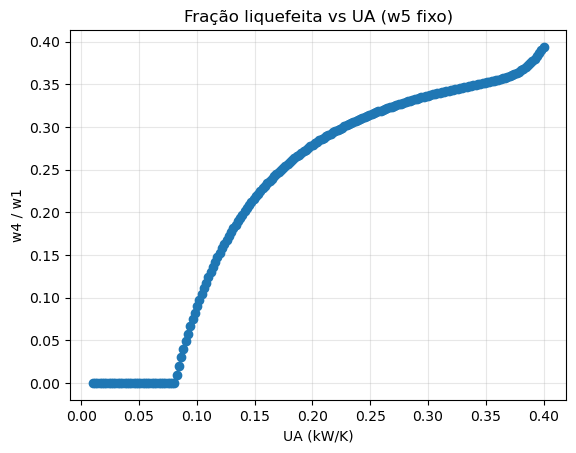

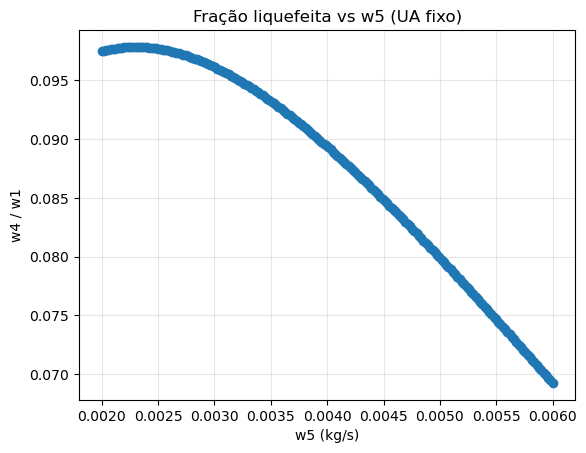

In [3]:
# Funções BÁSICAS de varredura (um parâmetro por vez)
# PRÉ-REQ: já existirem x0, lb, ub, solve_box(...), sistema_residuos(x, p) e p_base
# Ordem de p: [UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000]

import numpy as np
import matplotlib.pyplot as plt

def varre_UA(p_base, UA_min=0.1, UA_max=0.60, N=200):
    UA_vals = np.linspace(UA_min, UA_max, N)
    frac    = np.empty(N, dtype=float)   # w4/w1
    for i in range(N):
        p_i = p_base.copy()
        p_i[0] = UA_vals[i]              # UA
        fun = lambda z, p=p_i: sistema_residuos(z, p)
        x_sol, _ = solve_box(fun, x0, lb, ub, echo=False)
        frac[i] = x_sol[0] / p_i[1]      # w4 / w1 (w1 = p_i[1])
    return UA_vals, frac

def varre_w5(p_base, w5_min=0.002, w5_max=0.006, N=200):
    w5_vals = np.linspace(w5_min, w5_max, N)
    frac    = np.empty(N, dtype=float)   # w4/w1
    for i in range(N):
        p_i = p_base.copy()
        p_i[2] = w5_vals[i]              # w5
        fun = lambda z, p=p_i: sistema_residuos(z, p)
        x_sol, _ = solve_box(fun, x0, lb, ub, echo=False)
        frac[i] = x_sol[0] / p_i[1]      # w4 / w1
    return w5_vals, frac

# ---- Exemplos de uso (gera 2 gráficos simples) ----
UA_vals, frac_UA = varre_UA(p_base, UA_min=0.01, UA_max=0.4, N=200)
plt.figure()
plt.plot(UA_vals, frac_UA, "o-")
plt.xlabel("UA (kW/K)")
plt.ylabel("w4 / w1")
plt.title("Fração liquefeita vs UA (w5 fixo)")
plt.grid(True, alpha=0.3)
plt.show()

w5_vals, frac_w5 = varre_w5(p_base, w5_min=0.002, w5_max=0.006, N=200)
plt.figure()
plt.plot(w5_vals, frac_w5, "o-")
plt.xlabel("w5 (kg/s)")
plt.ylabel("w4 / w1")
plt.title("Fração liquefeita vs w5 (UA fixo)")
plt.grid(True, alpha=0.3)
plt.show()


# Resultados — Análise Matemática e Física

## Matemática essencial (separador)

**Dados relevantes (do enunciado):**  
- No separador a 100 kPa: $h_4=10\ \text{kJ/kg}$ (líquido saturado) e $h_6=31\ \text{kJ/kg}$ (vapor saturado).  
- No lado quente que entra no trocador: $h_1=78.3\ \text{kJ/kg}$ a $T_1=15\ \text{K}$, com $c_{p,2000}=6.4$ $\text{kJ/(kg.K)}$.

Pelas equações de balanço no separador,
$$
w_4+w_6=w_1,\qquad w_1h_2=w_4h_4+w_6h_6
$$
obtemos diretamente
$$
\frac{w_4}{w_1}=\frac{h_6-h_2}{h_6-h_4}.
$$

Como $h_6=31$ e $h_4=10\ \text{kJ/kg}$, a fração só pode ser **positiva** se o numerador for positivo, isto é,
$$
h_2< h_6 = 31\ \text{kJ/kg}.
$$
Se $h_2\ge 31$, então $(h_6-h_2)\le 0$ e, como $w_4\ge 0$, o único valor admissível é $w_4=0$ (sem líquido).  
Da relação no trocador do lado quente,
$$
h_2 = h_1 + c_{p,2000}\,(T_2-T_1),
$$
encontramos o limiar de temperatura que zera a produção:
$$
T_2^\star
= T_1 + \frac{31-h_1}{c_{p,2000}}
= 15 + \frac{31-78.3}{6.4}
\approx 7.61\ \text{K}.
$$
Portanto, **só há liquefação se $T_2\le 7.61\ \text{K}$**; abaixo desse limite, a expressão acima gera $\frac{w_4}{w_1}>0$, e acima dele resulta $w_4=0$.

## Leitura dos gráficos

**1) $w_4/w_1$ vs UA (com $w_5$ fixo)**  
- Para **UA** pequeno, o trocador não atinge $T_2^\star$ e surge um **platô em $w_4=0$** (sem líquido).  
- Aumentando **UA**, $T_2$ cai, $h_2$ diminui e $w_4/w_1$ **cresce** com **retornos decrescentes** (característica do LMTD).  
- As soluções mantêm $T_1\ge T_8$ e $T_2\ge T_7$ (sem *temperature cross*).

**2) $w_4/w_1$ vs $w_5$ (com UA fixo) — por que há um máximo?**  

Pelo separador:
$$
\frac{w_4}{w_1}=\frac{h_6-h_2}{h_6-h_4},
\qquad
h_2=h_1-\frac{Q}{w_1}
\;\Rightarrow\;
\frac{w_4}{w_1}=\frac{h_6-h_1}{h_6-h_4}+\frac{Q}{(h_6-h_4)\,w_1}.
$$
Ou seja, maximizar $w_4/w_1$ é o mesmo que **maximizar o calor transferido $Q$** no trocador. Ao aumentar $w_5$, acontecem **dois efeitos opostos**:

1. **Entrada fria mais quente**: o misturador eleva $T_7$  
   ⇒ a "diferença térmica" do trocador de calor diminui (menor $T_1 - T_7$ e menor $\Delta T_{\mathrm{lm}}$) ⇒ **$Q$ tende a cair**.

2. **Mais capacidade no lado frio**: aumenta a vazão total fria $w_7=w_6+w_5$  
   ⇒ o lado frio consegue absorver mais calor  ⇒ **$Q$ tende a subir**.

Para $w_5$ pequeno, o ganho de capacidade domina (**$Q$ sobe**); depois, o aumento de $T_7$ domina (**$Q$ desce**).  
O resultado é um **ponto de máximo de $Q$**, e portanto um **máximo de $w_4/w_1$**.



## Checagens físicas
A produção de entropia no trocador (com $c_p$ constantes) é não-negativa:
$$
\Delta S_{\mathrm{HX}} = w_1\,c_{p,2000}\,\ln\!\left(\frac{T_2}{T_1}\right)
+ w_7\,c_{p,100}\,\ln\!\left(\frac{T_8}{T_7}\right) \ge 0,
$$
e os pinches $T_1-T_8$ e $T_2-T_7$ permanecem não negativos.





## Reduzindo o Tamanho do Sistema

Podemos reduzir o número de equações no sistema fazendo manipulações algébricas. Embora o sistema fique menor, isso nem sempre é uma boa ideia, pois aumentam as não-linearidades (*e.g.*, podem aparecer mais divisões, logaritmos e produtos acoplados) e, consequentemente, a dificuldade numérica para alcançar a solução. Ainda, a manipulação algébrica às vezes recupera a essência do fenômeno e a relação entre as variáveis. Por outro lado, às vezes a manipulaçõa algébrica distancia as equações da sua origem física, dificultando a interpretação do analista. Cada caso deve ser analisado.

**Sistema original 9x9**  
1. Massa no sistema: $w_7 + w_4 = w_1 + w_5$  
2. Massa no separador: $w_4 + w_6 = w_1$  
3. 1ª Lei no trocador: $w_1(h_1 - h_2) = w_7(h_8 - h_7)$  
4. 1ª Lei no flash: $w_1 h_2 = w_4 h_4 + w_6 h_6$  
5. Correl. quente: $h_2 - h_1 = c_{p,2000}(T_2 - T_1)$  
6. Correl. fria (saída fria): $h_7 - h_6 = c_{p,100}(T_7 - T_6)$  
7. Correl. fria (saída quente): $h_8 - h_6 = c_{p,100}(T_8 - T_6)$  
8. Misturador: $w_7 h_7 = w_6 h_6 + w_5 h_5$  
9. Trocador (LMTD): $w_1(h_1 - h_2) = UA \dfrac{(T_1-T_8)-(T_2-T_7)}{\ln\!\big(\dfrac{T_1-T_8}{T_2-T_7}\big)}$

**Incógnitas**  
$x = [w_4,\ w_6,\ w_7,\ h_2,\ h_7,\ h_8,\ T_2,\ T_7,\ T_8]$.

**Parâmetros**  
$p = [UA,\ w_1,\ w_5,\ h_1,\ h_4,\ h_5,\ h_6,\ T_1,\ T_6,\ c_{p,100},\ c_{p,2000}]$.

---

### Ideia da redução

Escolhemos duas incógnitas livres, por exemplo $(w_4, T_8)$. As demais são obtidas por substituições diretas:

**Passo 1 — Vazões**  
$w_6 = w_1 - w_4$, $\quad w_7 = w_1 + w_5 - w_4$.

**Passo 2 — Entalpias do lado quente e do misturador**  
$h_2 = h_6 + \dfrac{w_4}{w_1}(h_4 - h_6)$,  
$h_7 = \dfrac{w_6 h_6 + w_5 h_5}{w_7}$.

**Passo 3 — Temperaturas via $c_p$ constantes**  
$T_2 = T_1 + \dfrac{h_2 - h_1}{c_{p,2000}}$,  
$T_7 = T_6 + \dfrac{h_7 - h_6}{c_{p,100}}$,  
$h_8 = h_6 + c_{p,100}(T_8 - T_6)$.

Assim, tudo passa a depender apenas de $(w_4, T_8)$ e dos parâmetros.

---

### Sistema reduzido 2×2 em $(w_4, T_8)$

**Definições auxiliares (tudo em função de $w_4$ e $T_8$):**
- $w_6(w_4) = w_1 - w_4$
- $w_7(w_4) = w_1 + w_5 - w_4$
- $h_2(w_4) = h_6 + \dfrac{w_4}{w_1}\,(h_4 - h_6)$
- $h_7(w_4) = \dfrac{w_6(w_4)\,h_6 + w_5\,h_5}{\,w_7(w_4)\,}$
- $T_2(w_4) = T_1 + \dfrac{h_2(w_4) - h_1}{c_{p,2000}}$
- $T_7(w_4) = T_6 + \dfrac{h_7(w_4) - h_6}{c_{p,100}}$
- $h_8(T_8) = h_6 + c_{p,100}\,(T_8 - T_6)$

**Equações (somente $w_4$ e $T_8$ como variáveis):**
1. **Balanço de energia no trocador de calor (Eq. 3)**  
   $$
   F_1(w_4,T_8)
   = w_1\big(h_1 - h_2(w_4)\big)
     - \underbrace{w_7(w_4)}_{\,w_1+w_5-w_4}\,\Big(h_8(T_8) - h_7(w_4)\Big)
   = 0.
   $$

2. **Lei do trocador via LMTD (Eq. 9)**  
   $$
   F_2(w_4,T_8)
   = w_1\big(h_1 - h_2(w_4)\big)
     - UA\;\frac{\big(T_1 - T_8\big) - \big(T_2(w_4) - T_7(w_4)\big)}
                  {\ln\!\left(\dfrac{T_1 - T_8}{\,T_2(w_4) - T_7(w_4)\,}\right)}
   = 0.
   $$

> Agora o sistema **não tem \(w_7\) como incógnita** — ele é sempre substituído por $w_7(w_4)=w_1+w_5-w_4$.
>
> **Domínio físico**: impor $T_1>T_8$ e $T_2(w_4)>T_7(w_4)$ evita *temperature cross* e mantém o LMTD bem definido.



In [4]:
# ====== Sistema reduzido 2x2 (variáveis: [w4, T8]) ======
import numpy as np
from scipy.optimize import least_squares

# Parâmetros como VETOR (mesma ordem de antes):
# p = [UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000]
p_base = np.array([0.1, 0.005, 0.004, 78.3, 10.0, 53.0, 31.0, 15.0, 4.2, 5.8, 6.4], dtype=float)

# --------------------------------------------------------
# Utilitários já usados antes
def _dtlm_estavel(d1, d2):
    # LMTD robusto (evita 0/0 quando d1≈d2)
    if abs(d1 - d2) <= 1e-8 * max(abs(d1), abs(d2), 1.0):
        return 0.5*(d1 + d2)
    return (d1 - d2)/np.log(d1/d2)

def _soft_clamp_pos(x, eps=1e-6, k=50.0):
    # ~max(x, eps) de forma suave (derivável)
    return eps + np.log1p(np.exp(k*(x - eps)))/k

# --------------------------------------------------------
# Resíduos do sistema REDUZIDO (2x2): F1=energia HX, F2=LMTD
# x2 = [w4, T8]
def sistema_residuos_2x2(x2, p, alpha=50.0, eps=1e-6, k=50.0):
    UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000 = p
    w4, T8 = x2

    # Vazões
    w6 = w1 - w4
    w7 = w1 + w5 - w4

    # Propriedades/temperaturas auxiliares (tudo função de w4 e T8)
    h2 = h6 + (w4/w1)*(h4 - h6)
    h7 = (w6*h6 + w5*h5)/w7
    T2 = T1 + (h2 - h1)/cp_2000
    T7 = T6 + (h7 - h6)/cp_100
    h8 = h6 + cp_100*(T8 - T6)

    # ΔT's do trocador + clamp suave (evita cross/negativo)
    d1  = T1 - T8
    d2  = T2 - T7
    d1c = _soft_clamp_pos(d1, eps=eps, k=k)
    d2c = _soft_clamp_pos(d2, eps=eps, k=k)

    # Equações do HX
    Q_hot = w1*(h1 - h2)                # kW
    F1    = Q_hot - w7*(h8 - h7)        # balanço de energia (Eq. 3)
    dtm   = _dtlm_estavel(d1c, d2c)     # LMTD estável
    F2    = Q_hot - UA*dtm              # Eq. (9) via LMTD

    # Penalidades suaves (viram zero quando físico)
    r_hot  = np.sqrt(alpha)*(d1c - d1)  # T1>=T8
    r_cold = np.sqrt(alpha)*(d2c - d2)  # T2>=T7

    return np.array([F1, F2, r_hot, r_cold], dtype=float)

# --------------------------------------------------------
# Solver com limites (mesma interface de antes)
def solve_box(fun, x0, lb, ub, echo=True):
    res = least_squares(fun, x0, bounds=(lb, ub),
                        method="trf", xtol=1e-9, ftol=1e-9, gtol=1e-9, max_nfev=2000)
    r = fun(res.x)
    if echo:
        print("status =", res.status, "|", res.message)
        print("nfev =", res.nfev, "| ||res||_2 =", np.linalg.norm(r))
    return res.x, r

# --------------------------------------------------------
# Chute e limites do 2x2
# x2 = [w4, T8]
x0_2 = np.array([5e-4, 10.0], float)
lb_2 = np.array([0.0,   -50.0], float)   # w4 >=0 ; T8 livre (use se quiser T8>=0)
ub_2 = np.array([2e-2,  500.0], float)

# Executar
p = p_base.copy()
fun2 = lambda z: sistema_residuos_2x2(z, p)
x2_star, r2 = solve_box(fun2, x0_2, lb_2, ub_2)
print("x2* =", x2_star)   # [w4, T8]
print("res2 =", r2)

# (Opcional) recuperar variáveis derivadas para inspeção rápida:
def rec_vars_from_w4_T8(w4, T8, p):
    UA, w1, w5, h1, h4, h5, h6, T1, T6, cp_100, cp_2000 = p
    w6 = w1 - w4
    w7 = w1 + w5 - w4
    h2 = h6 + (w4/w1)*(h4 - h6)
    h7 = (w6*h6 + w5*h5)/w7
    T2 = T1 + (h2 - h1)/cp_2000
    T7 = T6 + (h7 - h6)/cp_100
    h8 = h6 + cp_100*(T8 - T6)
    return dict(w6=w6, w7=w7, h2=h2, h7=h7, h8=h8, T2=T2, T7=T7)

vars2 = rec_vars_from_w4_T8(x2_star[0], x2_star[1], p)
print(vars2)


status = 1 | `gtol` termination condition is satisfied.
nfev = 4 | ||res||_2 = 7.362578480345807e-09
x2* = [4.46846490e-04 1.09304027e+01]
res2 = [4.13141427e-09 6.09417575e-09 0.00000000e+00 0.00000000e+00]
{'w6': np.float64(0.004553153510083719), 'w7': np.float64(0.008553153510083721), 'h2': np.float64(29.12324474235162), 'h7': np.float64(41.28860289906554), 'h8': np.float64(70.03633575185995), 'T2': np.float64(7.3161319909924405), 'T7': np.float64(5.973897051563024)}


## Comparação das Soluções 9x9 e 2x2

Como esperado, os dois sistemas (original e reduzido) têm a mesma solução.

## Propriedades reais do hélio no sistema original

Agora, iremos partir das 9 equações originais e trocaremos apenas o necessário para que as
entalpias venham de uma base termodinâmica (ex.: CoolProp) em vez de
aproximações com $c_p$ constante (que usamos até agora, de acordo com o enunciado do problema).
Embora os resultados provavelmente fiquem qualitativamente parecidos, pode haver uma certa diferença
quantitativa. Adicionalmente, o uso das propriedades reais permitirá um estudo paramétrico mais avançado, 
por exemplo, estudando a influência da pressão do separador.

### 1) Parâmetros
- **Antes**: $[UA,\ w_1,\ w_5,\ h_1,\ h_4,\ h_5,\ h_6,\ T_1,\ T_6,\ c_{p,100},\ c_{p,2000}]$  
- **Agora** (com propriedades reais):  
  $$
  [UA,\ w_1,\ w_5,\ T_1,\ T_5,\ T_6,\ P_{\rm hot},\ P_{\rm cold}]
  $$
  onde:
  - $T_1$ é a temperatura de entrada do lado quente (ponto 1),
  - $T_5$ é a temperatura da corrente 5 (turbina),
  - $T_6$ é a temperatura de entrada do lado frio,
  - $P_{\rm hot}$ é a pressão do lado quente (≈ $2000\ {\rm kPa}$),
  - $P_{\rm cold}$ é a pressão do separador / lado frio (≈ $100\ {\rm kPa}$).

  As entalpias fixas **$h_1,\ h_4,\ h_5,\ h_6$** e os **$c_p$** deixam de ser parâmetros, pois
  serão calculadas a partir de $(T,P)$.

### 2) Cálculo das entalpias que “serão usadas como dados”
- **Entrada quente**: $h_1 = H(T_1, P_{\rm hot})$
- **Corrente da turbina (5)**: $h_5 = H(T_5, P_{\rm cold})$
- **Separador a $P_{\rm cold}$**:
  - líquido saturado: $h_4 = H(P_{\rm cold},\,Q{=}0)$  
  - vapor  saturado: $h_6 = H(P_{\rm cold},\,Q{=}1)$

Aqui $H(\cdot)$ é a entalpia específica obtida da base de propriedades (CoolProp).

### 3) Equações que **permanecem iguais**
- (1) $w_7 + w_4 = w_1 + w_5$
- (2) $w_4 + w_6 = w_1$
- (3) $w_1(h_1 - h_2) = w_7(h_8 - h_7)$
- (4) $w_1 h_2 = w_4 h_4 + w_6 h_6$
- (8) $w_7 h_7 = w_6 h_6 + w_5 h_5$
- (9) $w_1(h_1 - h_2) = UA\,\Delta T_{\rm lm}$, com $\Delta T_{\rm lm}$ em forma LMTD estável
  (mantemos o “clamp” para evitar *temperature cross*).

### 4) Equações que **mudam** (substituem o uso de $c_p$)
- **Antes**:  
  $(h_2 - h_1) = c_{p,2000}(T_2 - T_1)$,  
  $(h_7 - h_6) = c_{p,100}(T_7 - T_6)$,  
  $(h_8 - h_6) = c_{p,100}(T_8 - T_6)$.

- **Agora** (fechamento termo-físico real):  
  $$
  \boxed{\,h_2 = H(T_2, P_{\rm hot})\,},\qquad
  \boxed{\,h_7 = H(T_7, P_{\rm cold})\,},\qquad
  \boxed{\,h_8 = H(T_8, P_{\rm cold})\,}.
  $$
  Essas três relações entram como resíduos (5)–(7) do sistema.

### 5) Observações práticas
- **Pinches**: manter $T_1 \ge T_8$ e $T_2 \ge T_7$ (com penalidade suave) para evitar
  $\Delta T_{\rm lm}$ negativo e garantir solução física.
- **Robustez numérica**: continuar usando a forma **LMTD estável** (tratamento do limite
  $d_1 \to d_2$) e *soft clamp* em $\Delta T$.
- **Fallback**: se a biblioteca de propriedades não estiver disponível, pode-se
  cair para os $c_p$ constantes (apenas para manter o notebook executável).

Em resumo, **apenas as equações de fechamento termo-físico (5–7) mudam**;
todo o restante (balanços/misturador/trocador) permanece **idêntico** — porém,
agora as entalpias vêm de $H(T,P)$ do hélio real.


In [6]:
# ====== Sistema ORIGINAL com propriedades reais do hélio (CoolProp) ======
# Mantém a mesma estrutura e variáveis; só troca as Eqs. (5–7) por h(T,p) reais
# e calcula h1, h4, h5, h6 a partir de T/p dados (sem constantes).

import numpy as np
from scipy.optimize import least_squares

# ---------- estado inicial (mesma ordem de antes) ----------
# x = [w4, w6, w7, h2, h7, h8, T2, T7, T8]
x0 = np.array([5e-4, 4.5e-3, 9e-3, 20.0, 60.0, 80.0, 10.0, 7.0, 10.0], float)

# ---------- parâmetros agora: [UA, w1, w5, T1, T5, T6, P_hot, P_cold] ----------
# (T1: entrada quente; T5: corrente do turbo; T6: entrada fria; pressões em Pa)
p_real = np.array([0.1, 0.005, 0.004, 15.0, 8.0, 4.2, 2_000_000.0, 100_000.0], float)

# ---------- utilitários HX (iguais) ----------
def _dtlm_estavel(d1, d2):
    if abs(d1 - d2) <= 1e-8 * max(abs(d1), abs(d2), 1.0):
        return 0.5*(d1 + d2)
    return (d1 - d2)/np.log(d1/d2)

def _soft_clamp_pos(x, eps=1e-6, k=50.0):
    return eps + np.log1p(np.exp(k*(x - eps)))/k

# ---------- propriedades do hélio (CoolProp) ----------
try:
    from CoolProp.CoolProp import PropsSI
    def H_TP(T, P):   # kJ/kg
        return PropsSI('H', 'T', T, 'P', P, 'Helium')/1000.0
    def H_sat(P, Q):  # Q=0 líquido, Q=1 vapor (kJ/kg)
        return PropsSI('H', 'P', P, 'Q', Q, 'Helium')/1000.0
    HAVE_CP = True
except Exception as e:
    HAVE_CP = False
    print("Aviso: CoolProp não disponível. Caindo para cp constantes aproximadas.")
    # fallback simples (mantém o código rodando; valores não 'reais')
    cp_100, cp_2000 = 5.8, 6.4
    def H_TP(T, P):
        # referência em Tref=0 K com H=0 (apenas para manter execução)
        return cp_2000*T/1.0 if P > 5e5 else cp_100*T/1.0
    def H_sat(P, Q):
        return 10.0 if Q==0 else 31.0  # usa valores do enunciado

# ---------- resíduos com propriedades reais ----------
def sistema_residuos_real(x, p, alpha=50.0, eps=1e-6, k=50.0):
    # p = [UA, w1, w5, T1, T5, T6, P_hot, P_cold]
    UA, w1, w5, T1, T5, T6, P_hot, P_cold = p
    w4, w6, w7, h2, h7, h8, T2, T7, T8 = x

    # entalpias "de dados" calculadas a partir de T/p reais
    h1 = H_TP(T1, P_hot)          # entrada quente
    h4 = H_sat(P_cold, 0)         # líquido sat. (separador)
    h6 = H_sat(P_cold, 1)         # vapor  sat. (separador)
    h5 = H_TP(T5, P_cold)         # corrente 5 (turbina)

    # (1)…(4) e (8) permanecem iguais
    r1 = w7 + w4 - (w1 + w5)
    r2 = w4 + w6 - w1
    r3 = w1*(h1 - h2) - w7*(h8 - h7)
    r4 = w1*h2 - (w4*h4 + w6*h6)
    r8 = w7*h7 - (w6*h6 + w5*h5)

    # (5)…(7): consistência h(T,p) **reais**
    r5 = h2 - H_TP(T2, P_hot)
    r6 = h7 - H_TP(T7, P_cold)
    r7 = h8 - H_TP(T8, P_cold)

    # HX (Eq. 9) com LMTD estável + clamps de pinch
    d1  = T1 - T8
    d2  = T2 - T7
    d1c = _soft_clamp_pos(d1, eps=eps, k=k)
    d2c = _soft_clamp_pos(d2, eps=eps, k=k)
    Q   = w1*(h1 - h2)
    dtm = _dtlm_estavel(d1c, d2c)
    r9  = UA*dtm - Q

    # penalidade suave (vira zero quando físico)
    r10 = np.sqrt(alpha)*(d1c - d1)   # T1>=T8
    r11 = np.sqrt(alpha)*(d2c - d2)   # T2>=T7

    return np.array([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11], float)

# ---------- solver (mesma função de antes) ----------
def solve_box(fun, x0, lb, ub, echo=True):
    res = least_squares(fun, x0, bounds=(lb, ub),
                        method="trf", xtol=1e-9, ftol=1e-9, gtol=1e-9, max_nfev=2000)
    r = fun(res.x)
    if echo:
        print("status =", res.status, "|", res.message)
        print("nfev =", res.nfev, "| ||res||_2 =", np.linalg.norm(r))
    return res.x, r

# ---------- limites (mesma ordem de x) ----------
lb = np.array([0.0,  0.0,  0.0, -5e3, -5e3, -5e3,  0.5,  0.5,  0.5], float)  # T > 0 K
ub = np.array([0.02, 0.02, 0.02,  5e3,  5e3,  5e3, 80.0, 80.0, 80.0], float)

# ---------- executa ----------
p = p_real.copy()
fun = lambda z: sistema_residuos_real(z, p)
x_star, r = solve_box(fun, x0, lb, ub, echo=True)
print("x* =", x_star)   # [w4, w6, w7, h2, h7, h8, T2, T7, T8]
print("res =", r)

# Dica: para testar outra pressão/UA, ajuste p e chame novamente.
# Ex.: p2 = p.copy(); p2[0] = 0.2  # UA=0.2
#      x2, r2 = solve_box(lambda z: sistema_residuos_real(z, p2), x0, lb, ub, echo=False)


status = 1 | `gtol` termination condition is satisfied.
nfev = 248 | ||res||_2 = 1.2082857974860488e-13
x* = [3.21369153e-04 4.67863085e-03 8.67863085e-03 1.92449042e+01
 3.15555048e+01 6.02348209e+01 7.14318422e+00 5.77299176e+00
 1.09045982e+01]
res = [-9.91220994e-15  9.89573007e-15  5.55111512e-17  3.05311332e-16
 -1.10134124e-13  4.26325641e-14 -2.13162821e-14 -4.44089210e-16
 -1.27675648e-15  0.00000000e+00  0.00000000e+00]


# Comparação — modelo com $c_p$ constante vs. propriedades **reais** do hélio

**Soluções reportadas (mesma operação):**

- **Modelo $c_p$ constante (original)**  
  $w_4 = 4.468\times10^{-4}\ \text{kg/s}$  $\Rightarrow$  $w_4/w_1 \approx 0.089$  
  $h_2 = 29.12,\ h_7 = 41.29,\ h_8 = 70.04\ \text{kJ/kg}$  
  $T_2 = 7.316\ \text{K},\ T_7 = 5.974\ \text{K},\ T_8 = 10.93\ \text{K}$  
  $w_7 = 8.553\times10^{-3}\ \text{kg/s}$

- **Propriedades reais (CoolProp)**  
  $w_4 = 3.214\times10^{-4}\ \text{kg/s}$  $\Rightarrow$  $w_4/w_1 \approx 0.064$  
  $h_2 = 19.24,\ h_7 = 31.56,\ h_8 = 60.23\ \text{kJ/kg}$  
  $T_2 = 7.143\ \text{K},\ T_7 = 5.773\ \text{K},\ T_8 = 10.90\ \text{K}$  
  $w_7 = 8.679\times10^{-3}\ \text{kg/s}$

> Observação: as **entalpias absolutas** mudam bastante (típico ao trocar referência/ban­co de dados),
> mas o que fecha a física do problema são as **diferenças de entalpia** e os balanços.

---

## O que realmente importa são os **incrementos de entalpia**

- **Lado frio no trocador**  
  \[
  \Delta h_{\text{frio}} = h_8 - h_7
  \]
  - $c_p$ constante: $\Delta h_{\text{frio}} \approx 70.04 - 41.29 \approx 28.75\ \text{kJ/kg}$  
  - propriedades reais: $\Delta h_{\text{frio}} \approx 60.23 - 31.56 \approx 28.68\ \text{kJ/kg}$  
  **Resultado:** praticamente **iguais**.

- **Lado quente no trocador**  
  O balanço $w_1(h_1-h_2) = w_7(h_8-h_7)$ impõe
  \[
  \Delta h_{\text{quente}} = h_1 - h_2 = \frac{w_7}{w_1}\,\Delta h_{\text{frio}} .
  \]
  Usando as soluções:
  - $c_p$ constante: $\frac{w_7}{w_1}\approx 1.711 \Rightarrow \Delta h_{\text{quente}}\approx 1.711\times 28.75 \approx 49.2\ \text{kJ/kg}$.  
  - propriedades reais: $\frac{w_7}{w_1}\approx 1.736 \Rightarrow \Delta h_{\text{quente}}\approx 1.736\times 28.68 \approx 49.8\ \text{kJ/kg}$.

  **Conclusão:** embora $h_2$, $h_7$ e $h_8$ tenham mudado **~10 kJ/kg** cada, as **diferenças** que entram no
  trocador ($\Delta h_{\text{frio}}$, $\Delta h_{\text{quente}}$) ficaram **quase inalteradas**.
  Por isso, o calor no HX
  \[
  Q = w_1\Delta h_{\text{quente}} = w_7\Delta h_{\text{frio}} = UA\,\Delta T_{\mathrm{lm}}
  \]
  permanece coerente em ambos os modelos (resíduos $\sim 10^{-12}$).

---

## Impacto prático

- **Fração liquefeita**: com propriedades reais, obteve-se $w_4/w_1 \approx 6.4\%$ (vs. $8.9\%$ no modelo
  simplificado). A previsão quantitativa muda, mas **a física do HX não**: as **diferenças de entalpia**
  e a **igualdade de calores** (lado quente = lado frio = $UA\,\Delta T_{\mathrm{lm}}$) são mantidas.
- Em análises energéticas de trocadores, usar referências diferentes de entalpia **não** afeta o
  balanço, pois só entram **variações** ($\Delta h$). É por isso que modelos com $c_p$ constante e
  modelos “reais” podem ter **$h$ absolutas** distintas e ainda assim fechar os mesmos **$Q$**.


# Comparação — modelo com $c_p$ constante vs. propriedades **reais** do hélio

**Soluções reportadas (mesma operação):**

- **Modelo $c_p$ constante (original)**  
  $w_4 = 4.468\times10^{-4}\ \text{kg/s}$  $\Rightarrow$  $w_4/w_1 \approx 0.089$  
  $h_2 = 29.12,\ h_7 = 41.29,\ h_8 = 70.04\ \text{kJ/kg}$  
  $T_2 = 7.316\ \text{K},\ T_7 = 5.974\ \text{K},\ T_8 = 10.93\ \text{K}$  
  $w_7 = 8.553\times10^{-3}\ \text{kg/s}$

- **Propriedades reais (CoolProp)**  
  $w_4 = 3.214\times10^{-4}\ \text{kg/s}$  $\Rightarrow$  $w_4/w_1 \approx 0.064$  
  $h_2 = 19.24,\ h_7 = 31.56,\ h_8 = 60.23\ \text{kJ/kg}$  
  $T_2 = 7.143\ \text{K},\ T_7 = 5.773\ \text{K},\ T_8 = 10.90\ \text{K}$  
  $w_7 = 8.679\times10^{-3}\ \text{kg/s}$

> Observação: as **entalpias absolutas** mudam bastante (típico ao trocar referência/ban­co de dados),
> mas o que fecha a física do problema são as **diferenças de entalpia** e os balanços.

---

## O que realmente importa são os **incrementos de entalpia**

- **Lado frio no trocador**  
  $$
  \Delta h_{\text{frio}} = h_8 - h_7
  $$
  - $c_p$ constante: $\Delta h_{\text{frio}} \approx 70.04 - 41.29 \approx 28.75\ \text{kJ/kg}$  
  - propriedades reais: $\Delta h_{\text{frio}} \approx 60.23 - 31.56 \approx 28.68\ \text{kJ/kg}$  
  **Resultado:** praticamente **iguais**.

- **Lado quente no trocador**  
  O balanço $w_1(h_1-h_2) = w_7(h_8-h_7)$ impõe
  $$
  \Delta h_{\text{quente}} = h_1 - h_2 = \frac{w_7}{w_1}\,\Delta h_{\text{frio}} .
  $$
  Usando as soluções:
  - $c_p$ constante: $\frac{w_7}{w_1}\approx 1.711 \Rightarrow \Delta h_{\text{quente}}\approx 1.711\times 28.75 \approx 49.2\ \text{kJ/kg}$.  
  - propriedades reais: $\frac{w_7}{w_1}\approx 1.736 \Rightarrow \Delta h_{\text{quente}}\approx 1.736\times 28.68 \approx 49.8\ \text{kJ/kg}$.

  **Conclusão:** embora $h_2$, $h_7$ e $h_8$ tenham mudado **~10 kJ/kg** cada, as **diferenças** que entram no
  trocador ($\Delta h_{\text{frio}}$, $\Delta h_{\text{quente}}$) ficaram **quase inalteradas**.
  Por isso, o calor no HX
  $$
  Q = w_1\Delta h_{\text{quente}} = w_7\Delta h_{\text{frio}} = UA\,\Delta T_{\mathrm{lm}}
  $$
  permanece coerente em ambos os modelos (resíduos $\sim 10^{-12}$).

---

## Impacto prático

- **Fração liquefeita**: com propriedades reais, obteve-se $w_4/w_1 \approx 6.4\%$ (vs. $8.9\%$ no modelo
  simplificado). A previsão quantitativa muda, mas **a física do HX não**: as **diferenças de entalpia**
  e a **igualdade de calores** (lado quente = lado frio = $UA\,\Delta T_{\mathrm{lm}}$) são mantidas.
- Em análises energéticas de trocadores, usar referências diferentes de entalpia **não** afeta o
  balanço, pois só entram **variações** ($\Delta h$). É por isso que modelos com $c_p$ constante e
  modelos “reais” podem ter **$h$ absolutas** distintas e ainda assim fechar os mesmos **$Q$**.


 P_cold (kPa)   w4/w1 (%)    T2 (K)    ||res||
     70.0       7.355     7.056   7.9e-15
     75.0       7.271     7.076   3.6e-15
     80.0       7.157     7.093   2.9e-13
     85.0       7.016     7.108   2.3e-14
     90.0       6.848     7.121   1.3e-14
     95.0       6.652     7.133   4.2e-10
    100.0       6.427     7.143   4.6e-12
    105.0       6.174     7.152   1.1e-12
    110.0       5.891     7.159   2.0e-13
    115.0       5.577     7.164   6.4e-14
    120.0       5.229     7.168   3.6e-14
    125.0       4.846     7.171   6.6e-14
    130.0       4.424     7.172   1.1e-14
    135.0       3.960     7.171   1.8e-14
    140.0       3.450     7.169   5.8e-14


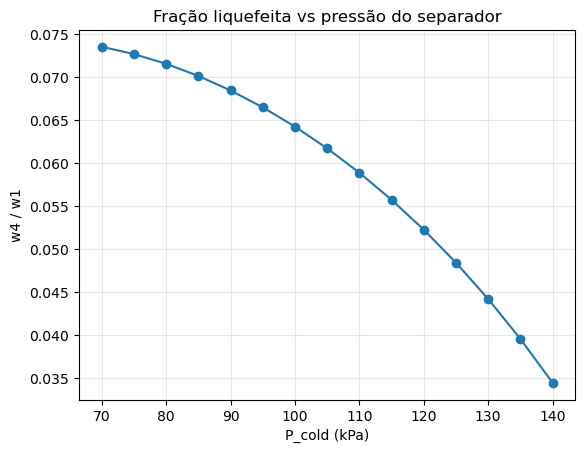

In [7]:
# ====== Estudo paramétrico simples: pressão do separador (P_cold) ======
# PRÉ-REQ: já executou as células com:
# - sistema_residuos_real(x, p)
# - solve_box(fun, x0, lb, ub)
# - x0, lb, ub, p_real (formato: [UA, w1, w5, T1, T5, T6, P_hot, P_cold])

import numpy as np
import matplotlib.pyplot as plt

# faixa de pressões do separador (kPa) — simples e curto
Pcold_kPa = np.linspace(70.0, 140.0, 15)  # ajuste se quiser

frac = []     # w4/w1
T2s  = []     # temperatura no ponto 2 (K)
resn = []     # norma do resíduo (checagem)
xg   = x0.copy()

for pk in Pcold_kPa:
    p = p_real.copy()
    p[7] = pk * 1e3  # P_cold em Pa
    fun = lambda z, pp=p: sistema_residuos_real(z, pp)
    xg, r = solve_box(fun, xg, lb, ub, echo=False)  # continuação
    frac.append(xg[0] / p[1])  # w4/w1
    T2s.append(xg[6])
    resn.append(np.linalg.norm(r))

# Tabela rápida no console
print(" P_cold (kPa)   w4/w1 (%)    T2 (K)    ||res||")
for pk, f, t2, rn in zip(Pcold_kPa, frac, T2s, resn):
    print(f"{pk:9.1f}     {100*f:7.3f}    {t2:6.3f}   {rn:.1e}")

# Gráfico simples
plt.figure()
plt.plot(Pcold_kPa, frac, "o-")
plt.xlabel("P_cold (kPa)")
plt.ylabel("w4 / w1")
plt.title("Fração liquefeita vs pressão do separador")
plt.grid(True, alpha=0.3)
plt.show()


## Análise do Resultado — Variação da Pressão do Separador

**Tendência observada:** à medida que $P_{\text{cold}}$ aumenta (70 → 140 kPa), a fração liquefeita $w_4/w_1$ cai de ~7,3% para ~3,4%, quase monotonicamente.

### Por que isso acontece?
Use a relação do separador  
$$ 
\frac{w_4}{w_1} = \frac{h_6 - h_2}{h_6 - h_4} 
$$,  
onde $h_4,h_6$ são entalpias de líquido/vapor saturados a $P_{\text{cold}}$, e $h_2$ é a entalpia na entrada do separador (saída quente do trocador).

1) **$P_{\text{cold}} \uparrow \Rightarrow T_{\text{sat}} \uparrow$**  
   As temperaturas do lado frio ($T_7,T_8$) sobem e a diferença térmica efetiva do trocador diminui.

2) **Menor “diferença térmica” no trocador $\Rightarrow Q \downarrow$**  
   Como $Q = UA\,\Delta T_{\rm lm}$, a queda de $\Delta T_{\rm lm}$ reduz $Q$. Então $ h_2 = h_1 - Q/w_1 \uparrow $ (entra no separador menos frio). O numerador $h_6-h_2$ diminui.

3) **Latente também muda**  
   O denominador $h_6 - h_4$ (calor latente) tende a diminuir levemente com a pressão; isoladamente isso aumentaria $w_4/w_1$, mas o efeito dominante é o item 2, logo $w_4/w_1$ cai.

### Leitura de engenharia
- Separadores com pressão mais alta exigem corrente de entrada mais fria para obter a mesma fração líquida — o trocador vira o gargalo.  
- Mantidos $UA$, $w_1$ e $w_5$, operar com $P_{\text{cold}}$ mais baixo (dentro de limites mecânicos/operacionais) aumenta o rendimento.  
- Resumo: $P_{\text{cold}}\uparrow \Rightarrow \Delta T_{\rm lm}\downarrow \Rightarrow Q\downarrow \Rightarrow h_2\uparrow \Rightarrow (h_6-h_2)\downarrow \Rightarrow w_4/w_1\downarrow$.


## Discussão Final

Modelamos a planta de hélio líquido (Prob. 6-16 do Stoecker) com 9 equações (massas e energias, misturador, separador e trocador com LMTD estável e penalização suave de *pinch*), resolvemos com `least_squares` (com limites) e validamos com resíduos na ordem de 1e−12. Depois, substituímos o fechamento com $c_p$ constante por **propriedades reais** do hélio (*CoolProp*). Fizemos estudos paramétricos simples em $UA$, $w_5$ e na pressão do separador $P_{\text{cold}}$.

**Resultados**
- Existe um **limiar** de liquefação: é preciso reduzir $T_2$ abaixo de um valor crítico para obter $w_4>0$; na prática, $\textit{UA}$ define “se” há líquido.  
- Com $\textit{UA}$ fixo, variar $w_5$ tem **dois efeitos opostos**: $w_7\uparrow$ ajuda $Q$, mas $T_7\uparrow$ reduz a “diferença térmica”; daí surge um **máximo** de $w_4/w_1$.  
- Aumentar $P_{\text{cold}}$ **reduz** $w_4/w_1$ porque $T_{\text{sat}}$ cresce, $\Delta T_{\rm lm}$ cai e $h_2$ entra mais alto no separador.  
- Ao trocar para propriedades reais, as **entalpias absolutas** mudam, mas as **diferenças de entalpia** que entram nos balanços ficam quase iguais, mantendo os $Q$ coerentes.

**Custos e aspectos fora do escopo do balanço.**  
O notebook avalia desempenho térmico, mas a decisão de projeto passa por custos e operação:

- **CAPEX** (*Capital Expenditures*): investimento inicial de equipamentos — trocador de calor (produto $\textit{UA}$ = coeficiente global de troca × área, materiais criogênicos, isolamento), compressor, turbina, válvulas e instrumentação.
- **OPEX** (*Operating Expenditures*): custo operacional contínuo — principalmente eletricidade para **compressão** e **refrigeração** do **reciclo de hélio** (o gás recircula; perdas e vazamentos têm custo).
- **Irreversibilidades**: fontes de perda de desempenho que aumentam o consumo de energia:
  - **Válvula JT** (*Joule–Thomson*): expansão estrangulada gera produção de entropia.
  - **Quedas de pressão** em linhas e no HX (*heat exchanger*, trocador de calor).
  - **Eficiência da turbina** menor que 100%.
- **Confiabilidade e manutenção** (*reliability*): disponibilidade da planta, custo de parada, estoque de hélio.

**Diretriz prática.** Operar com $\textit{UA}$ com **margem** acima do limiar de liquefação; manter a **razão de capacidades térmicas** próxima de 1 ($C^* \approx \dot m_{\text{frio}} c_{p,\text{frio}} / (\dot m_{\text{quente}} c_{p,\text{quente}})$) para boa efetividade do HX; e usar $P_{\text{cold}}$ o mais baixo viável. A escolha final equilibra **CAPEX × OPEX × confiabilidade**.



Propostas de Trabalhos Adicionais

**(1) Só mudando parâmetros (sem alterar o código):**
- Varreduras em $\mathrm{UA}$, $w_1$, $w_5$, $T_1$, $T_5$, $P_{\text{hot}}$, $P_{\text{cold}}$:
  olhar como $w_4/w_1$ e $T_2$ mudam quando variamos **um** parâmetro de cada vez.
- Mapas 2D (contorno) variando **dois** parâmetros por vez (ex.: $\mathrm{UA}$ vs. $w_5$) para localizar regiões “boas”.
- “Sensibilidade” simples: quanto $w_4/w_1$ muda quando cada parâmetro muda 1%.
- Para cada $\mathrm{UA}$, varrer $w_5$ com **continuação** (usar a solução anterior como chute) e achar o **máximo** de $w_4/w_1$ por busca em grade.

**(2) Pequenas alterações no notebook:**
- **Otimização básica**: maximizar $w_4$ com restrições de pinch e limites (busca em grade ou `scipy.optimize`).
- **Relatório automático**: imprimir norma dos resíduos, pinches e verificação de $\Delta S_{\rm HX}\ge 0$ ao final de cada varredura.
- **Estimativa de potência de compressão** do reciclo (modelo politrópico com eficiência fixa) para ter uma noção de OPEX.
- Usar **CoolProp** quando disponível; se não, cair para $c_p$ constante (fallback).  
- **Multi-start**: tentar **vários chutes iniciais** para evitar cair em ramos não físicos.

**(3) Extensões estruturais (mudanças moderadas/maiores):**
- Incluir **quedas de pressão** no HX e **eficiência** da turbina (mais realismo energético).
- Trocar LMTD por um modelo de HX **$\varepsilon$–NTU** ou **discretizar** o HX em segmentos (1D) para capturar perfis de temperatura.
- **Separador com equilíbrio**: calcular frações de líquido/vapor a partir de saturação em $P_{\text{cold}}$ (em vez de assumir $h_4,h_6$ fixos).
- **Modelo de custos**: CAPEX (área do HX, máquinas) + OPEX (energia, perdas de hélio) e buscar o **ponto econômico**.
- **Robustez**: variações ± nos parâmetros ou amostragens (Monte Carlo) para ver a sensibilidade do resultado final.
